<a href="https://colab.research.google.com/github/EnglishDevil/Mapthing/blob/master/Map_of_Obesity_Yorkshire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Map showing prescriptions for obesity in Yorkshire and the humber

Learn how to make maps of the UK with numbers superimposed over it.
Graphs, bar charts etc

Mental health data 

# Install the required libraries

In [1]:
!apt-get install  libgeos-3.5.0
!apt-get install  libgeos-dev
!pip install  https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (179 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 130911 files and directories currently installed.)
Prep

In [1]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.2.0
    Uninstalling pyproj-2.2.0:
      Successfully uninstalled pyproj-2.2.0


# Begin producing the region map

Here I just did Yorkshire but perhaps we can change it to the whole uk

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

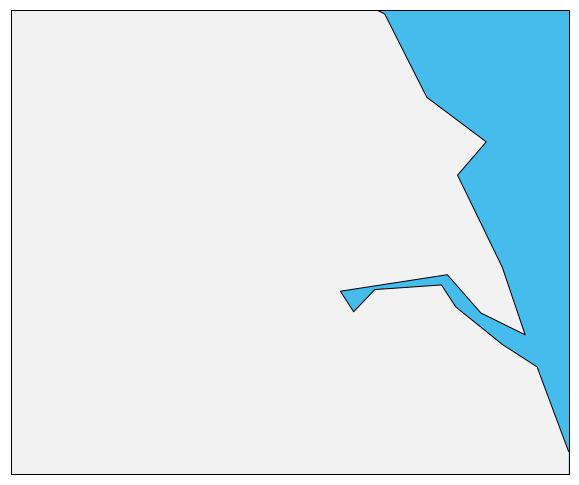

In [4]:
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='l', # c, l, i, h, f or None # These are the resolutions, crude low intermediate high and full. Use low or crude to begin then full at the end.
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-2.37, llcrnrlat= 53.17, urcrnrlon=0.32, urcrnrlat=54.49)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

#Next; Need to uploaded shape files to github and access them using the script below

#boundaries
#m.readshapefile('data/uk_postcode_bounds/Areas', 'areas')

# Changing the dataset so that it will show up on a map

1.   Need to make the location data so that it has a longditude and latitude
> a. Success! Was able to get the shape files and other data from geoportal.statistics.gov.uk

> b. Was able to get them for CCG and region


2.   Need to remove superfluous collumns
3.   Do basic exploratory analysis


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/EnglishDevil/Mapthing/master/Obes-phys-acti-diet-eng-tab-2019%20table%204.2.csv")
df.head()

#Need to remove the unamed collumn.
#Need to see if it can plot the data sensibly, like rearrange the data so that all of the N are collated etc.
#Need to use the long and lat data from geoportal to give each of the CCG's a long and lat so the shape file can be used.

,Region,Unnamed: 1,Commissioning_Region,Area,CCG,Prescription_items,per_1000_pop
0,E92000001,NaN,NaN,NaN,ENGLAND,"389,464",7.0
1,E40000001,NaN,Y54,N,North of England,"141,897",9.0
2,E39000029,NaN,Q72,N,NHS England North (Yorkshire and Humber),"47,999",9.0
3,E38000001,NaN,02N,N,"NHS Airedale, Wharfedale and Craven",827,5.0
4,E38000006,NaN,02P,N,NHS Barnsley,"3,996",16.0


In [66]:
#rename collumns
df.columns = ['region' , 'blank' , 'com_region' , 'area' , 'ccg' , 'pres_items' , 'per_1000_pop']
#remove the dud rows at the end 
#cdf clean dataframe
truncate = df[:-12]
#below is when i tried to remove the , values in the numbers but it wasnt working so i tried a different way
#cdf['pres_items'].astype(float)
#clean = truncate.replace(to_replace= r",", value='', regex=True)
#cdf = clean['pres_items'].astype(float)

#removing comma values using method sam showed me
truncate['pres_items'] = truncate['pres_items'].apply (lambda x : float(str(x).replace(',','')))
#still can object so change it to a numeric value
truncate['pres_items'] = pd.to_numeric(truncate['pres_items'])
cdf = truncate

cdf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,region,blank,com_region,area,ccg,pres_items,per_1000_pop
0,E92000001,NaN,NaN,NaN,ENGLAND,389464.0,7.0
1,E40000001,NaN,Y54,N,North of England,141897.0,9.0
2,E39000029,NaN,Q72,N,NHS England North (Yorkshire and Humber),47999.0,9.0
3,E38000001,NaN,02N,N,"NHS Airedale, Wharfedale and Craven",827.0,5.0
4,E38000006,NaN,02P,N,NHS Barnsley,3996.0,16.0
5,E38000008,NaN,02Q,N,NHS Bassetlaw,695.0,6.0
6,E38000018,NaN,02W,N,NHS Bradford City,1133.0,13.0
7,E38000019,NaN,02R,N,NHS Bradford Districts,1545.0,5.0
8,E38000025,NaN,02T,N,NHS Calderdale,1855.0,9.0
9,E38000044,NaN,02X,N,NHS Doncaster,4060.0,13.0


In [68]:
#Basic Analysis
#Length of the dataframe
len(cdf)

#what datatypes in each column
for col in cdf.columns:
  print('{0} : {1}' .format(col, cdf[col].dtype))
  
#basic stats
cdf.describe()

#All good! Next step

region : object
blank : float64
com_region : object
area : object
ccg : object
pres_items : float64
per_1000_pop : float64


,blank,pres_items,per_1000_pop
count,0.0,226.000000,226.000000
mean,NaN,6884.539823,6.995575
std,NaN,29582.674591,3.120538
min,NaN,4.000000,0.000000
25%,NaN,1041.500000,5.000000
50%,NaN,1710.000000,6.500000
75%,NaN,2790.750000,9.000000
max,NaN,389464.000000,17.000000


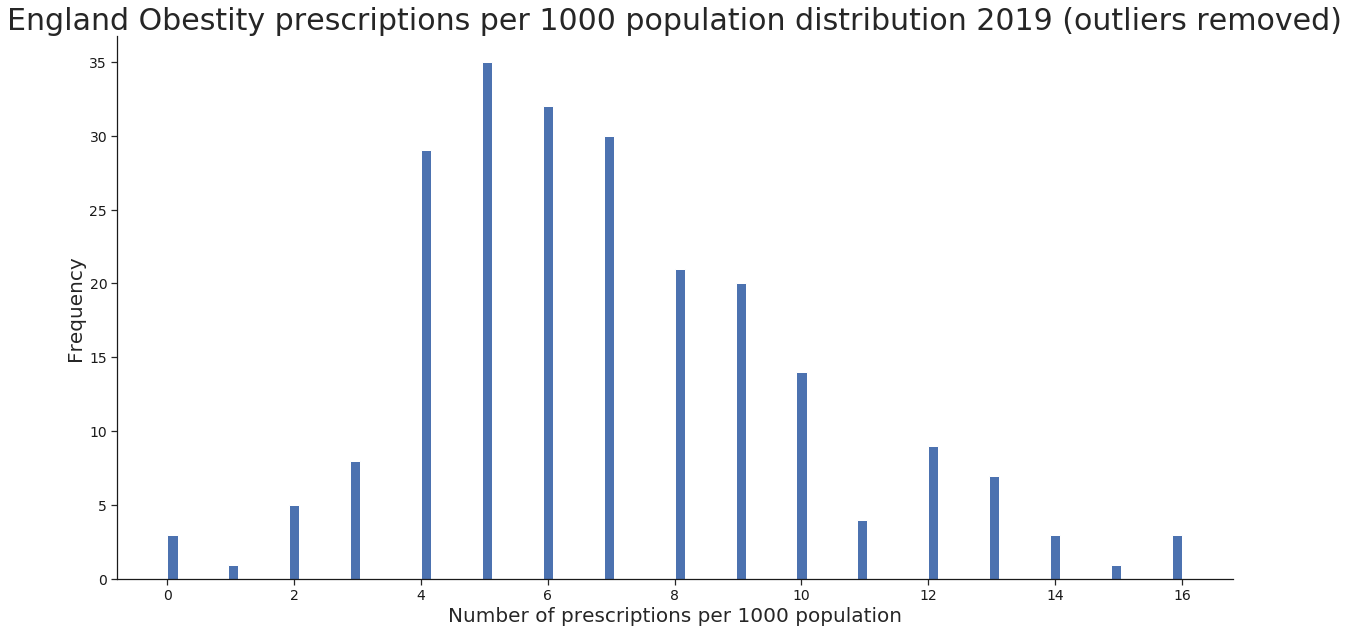

In [71]:
#A histogram of the data to see if its normally distributed
no_outliers = cdf[np.abs(cdf.per_1000_pop-cdf.per_1000_pop.mean())<=(3*cdf.per_1000_pop.std())]

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14, color='#1a1a1a')  
plt.yticks(fontsize=14, color='#1a1a1a')

plt.title('England Obestity prescriptions per 1000 population distribution 2019 (outliers removed)', fontsize=30)
plt.xlabel('Number of prescriptions per 1000 population', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.hist(no_outliers.per_1000_pop, bins=100);

# Adding the longditude and latitude

In [78]:
longlat = pd.read_csv('https://raw.githubusercontent.com/EnglishDevil/Mapthing/master/Clinical_Commissioning_Groups_April_2018_Super_Generalised_Clipped_Boundaries_in_England.csv', usecols=['ccg18cd','long','lat'])
longlat.columns = ['region', 'long', 'lat']
longlat.head()

,region,long,lat
0,E38000001,-2.093300,54.055649
1,E38000002,0.823374,51.130959
2,E38000004,0.129493,51.545528
3,E38000005,-0.218220,51.611080
4,E38000006,-1.549250,53.525799


# Stuff to do with saving the libaries in gdrive

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.append(0,nb_path)



Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [0]:
!apt-get install --target=$nb_path libgeos-3.5.0

E: Command line option --target=/content/notebooks is not understood in combination with the other options
